In [1]:
#import pandas and os
import pandas as pd
import os

## Merging 12 months of data in single file

In [2]:
# test if data url works
# df = pd.read_csv("Sales_Data/Sales_April_2019.csv")
# df.head()

In [3]:
files = [file for file in os.listdir('Sales_Data')]

all_months_data =  pd.DataFrame()

for file in files:
    if file != ".DS_Store":
#         print(file)
        df = pd.read_csv("Sales_Data/"+file)
        all_months_data = pd.concat([all_months_data, df])

In [4]:
all_months_data.to_csv("all_data.csv")

In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.shape

(186850, 7)

## Data Cleanup

### Find all NaN

In [6]:
row_has_NaN = all_data.isnull().any(axis=1)
rows_with_NaN = all_data[row_has_NaN]
rows_with_NaN.shape
all_data = all_data.dropna(how='any')
all_data.head(2)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"


*** Found 545 row out of all_data containing NaN and removed ***

In [7]:
#Identify and Remove Rows containing "Or"
rows_with_or = all_data[all_data['Order Date'].str[0:2] == "Or"]
rows_with_or.shape

(355, 7)

*** Found 355 rows out of all_data containing string Or in the column - Order Data***

In [8]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]
all_data.shape

(185950, 7)

In [9]:
#convert string of columns
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Identify the type of all columns

In [10]:
features = all_data.columns
type(features)

pandas.core.indexes.base.Index

In [11]:
for feature in features:
    type_of_feature = type(feature)
    print(feature,"->", type_of_feature)

Unnamed: 0 -> <class 'str'>
Order ID -> <class 'str'>
Product -> <class 'str'>
Quantity Ordered -> <class 'str'>
Price Each -> <class 'str'>
Order Date -> <class 'str'>
Purchase Address -> <class 'str'>


### #1: What was the best month for sales? How much was earned that month?

- Add column to seperate the month
- Add column for Daily Sales Value

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = pd.to_numeric(all_data['Month'])
# all_data.head(2)
all_data['Month'].unique()

array([12,  1,  4,  5,  2,  3,  8,  9,  6, 11, 10,  7])

In [13]:
all_data["Sales"] = all_data['Quantity Ordered'] * all_data['Price Each']

In [14]:
all_data.tail(2)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
186848,13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95
186849,13621,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301",6,2.99


In [15]:
monthlyData =  all_data.groupby('Month').sum()
monthlyData

,Unnamed: 0,Quantity Ordered,Price Each,Sales
Month,,,,
1,47433245,10903,1.811768e+06,1.822257e+06
2,72123197,13449,2.188885e+06,2.202022e+06
3,115333587,17005,2.791208e+06,2.807100e+06
4,167977608,20558,3.367671e+06,3.390670e+06
5,137829259,18667,3.135125e+06,3.152607e+06
6,92330356,15253,2.562026e+06,2.577802e+06
7,102752005,16072,2.632540e+06,2.647776e+06
8,71824951,13448,2.230345e+06,2.244468e+06
9,67863032,13109,2.084992e+06,2.097560e+06


In [16]:
import matplotlib.pyplot as plt
months = range(1, 13)
plt.bar(months, monthlyData['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month in Numbers")
plt.show()

<Figure size 640x480 with 1 Axes>

- December had the Highest Sale in the year
    - Possible because of christmas season
    - Christmas season is Gifting Season hence high sale
- Decembers earning are in 4.6M

### #2: Which City Has the Highest Sale

- Split the Address Column and Grab the city name
- Use apply, lambda
- Add City Column
- Dropping a column
- Answering the question (using groupby)
- Plotting our results

In [21]:
# .apply()

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + " (" + x.split(',')[2].split(' ')[1] + ")" )
# all_data['City'].unique()
all_data = all_data.drop(columns='Unnamed: 0')
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.0,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.0,New York City (NY)
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0,New York City (NY)


In [22]:
cityWiseData =  all_data.groupby('City').sum()
cityWiseData

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


[' Atlanta (GA)', ' Austin (TX)', ' Boston (MA)', ' Dallas (TX)', ' Los Angeles (CA)', ' New York City (NY)', ' Portland (ME)', ' Portland (OR)', ' San Francisco (CA)', ' Seattle (WA)']


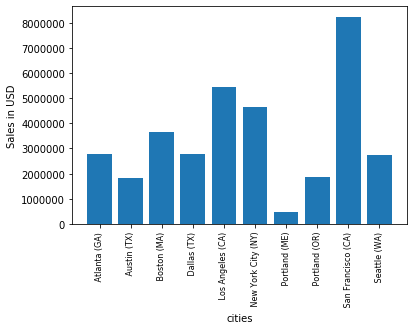

In [23]:
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby('City')]
print(cities)
plt.bar(cities, cityWiseData['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel("Sales in USD")
plt.xlabel("cities")
plt.show()

- Highest Sale occured in San Francisco
    - the Sale Value was 8.26M

### #3: What time should we display advertisements to maximize the likelihood of purchases?

- Using to_datetime() method
- Creating hour & minute columns
- Matplotlib line graph to plot our results
- Interpreting our results

### #4: What products are most often sold together? (1:02:17)
- Finding duplicate values in our DataFrame
- Use transform() method to join values from two rows into a single row
- Dropping rows with duplicate values
- Counting pairs of products (itertools, collections)

### #5: What product sold the most? Why do you think it did? (1:14:04)
- Graphing data
- Overlaying a second Y-axis on existing chart
- Interpreting our results